# import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_csv('./IRIS.csv')

In [3]:
iris_data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

**Checkin the information of the data and the number of missing values in our data**

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

**create a histogram plot of the Price column**

<Axes: xlabel='species', ylabel='count'>

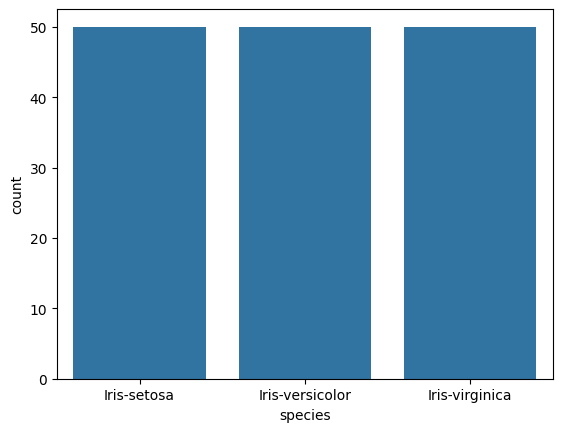

In [6]:
sns.countplot(data=iris_data,x='species')

# Spliting our data into training and testing

In [7]:
X = iris_data.drop('species',axis=1)

In [8]:
Y = iris_data['species']

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Applying KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)

In [11]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

# Making Predictions

**Making Prediction for just all record**

In [12]:
predictions = knn_model.predict(X_test)

# Checking Performance of the Model

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.93        30
   weighted avg       0.95      0.93      0.94        30



In [14]:
print(confusion_matrix(predictions,Y_test))

[[10  0  0]
 [ 0 12  2]
 [ 0  0  6]]


In [15]:
np.mean(predictions != Y_test)

0.06666666666666667

# Elbow Method For Best K Value

In [16]:
error = []

for k in range(1,20):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,Y_train)
  predictions = knn_model.predict(X_test)
  e = np.mean(predictions != Y_test)
  error.append(e)

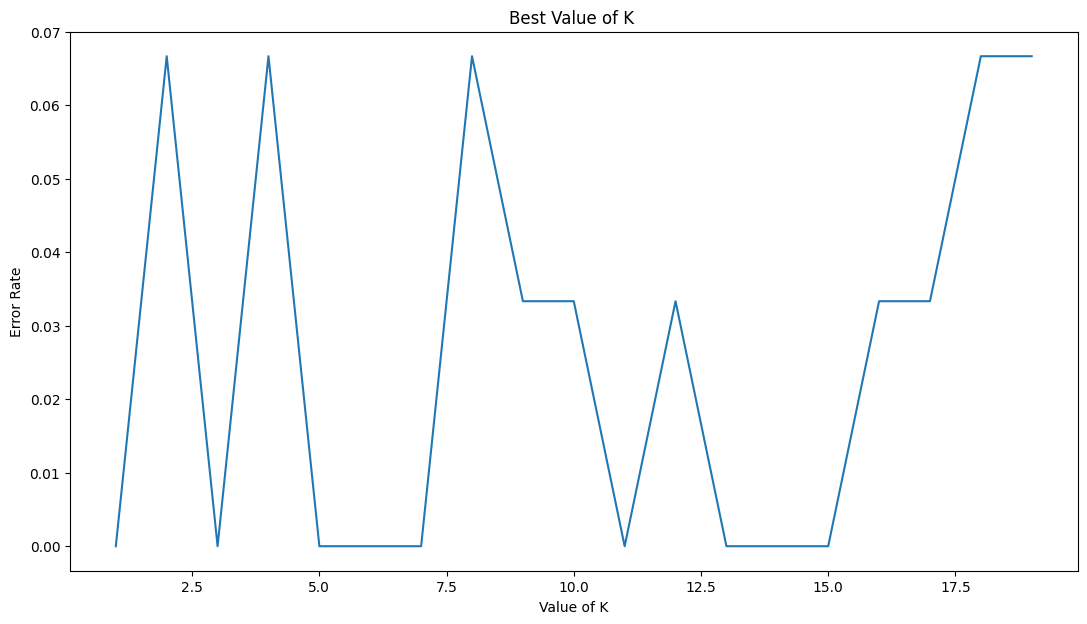

In [17]:
plt.figure(figsize=(13,7))
plt.plot(range(1,20),error)
plt.title('Best Value of K ')
plt.xlabel('Value of K')
plt.ylabel('Error Rate')
plt.show()